# GW2 Data: Postgres → CSV → Matplotlib

This notebook provides a clean, reproducible workflow to:

- Connect to a Postgres instance
- Run parameterized SQL queries
- Export results to timestamped CSV files
- Analyze and visualize data with Matplotlib

Environment configuration (use a `.env` file in the project root or export variables in the shell):
- `DB_URL` (e.g., `postgres://...`, the full URL)
- Optional: `OUTPUT_DIR` (defaults to `./data`)

Notes:
- Nothing sensitive is stored in the notebook; credentials are read from environment variables.
- CSV files are saved to `OUTPUT_DIR` with a timestamp suffix for reproducibility.



In [3]:
import os
from dotenv import load_dotenv

# Load environment variables from a .env file (project root)
load_dotenv()



True

In [ ]:
from sqlalchemy import create_engine
# from sqlalchemy.engine import URL
import pandas as pd

raw_connection_string = os.getenv("DB_URL")
if not raw_connection_string:
    raise ValueError("DB_URL is not set. Create a .env with DB_URL or export it in your shell.")

# Normalize scheme to ensure SQLAlchemy loads the correct dialect/driver
# Prefer psycopg (v3). Accepts postgres://..., postgresql://..., or postgresql+psycopg://...
if raw_connection_string.startswith("postgres://"):
    normalized_connection_string = "postgresql+psycopg://" + raw_connection_string[len("postgres://"):]
elif raw_connection_string.startswith("postgresql://"):
    normalized_connection_string = "postgresql+psycopg://" + raw_connection_string[len("postgresql://"):]
else:
    normalized_connection_string = raw_connection_string

engine = create_engine(normalized_connection_string)




In [5]:
prices_sql = "SELECT * FROM prices WHERE item_id = 19702 ORDER BY fetched_at DESC LIMIT 288"

prices_df = pd.read_sql(prices_sql, engine)

prices_df.head()

,id,item_id,whitelisted,buy_quantity,buy_unit_price,sell_quantity,sell_unit_price,fetched_at,created_at
0,791720839,19702,True,265699,180,694388,208,2025-11-21 12:25:41.194322+00:00,2025-11-21 12:25:41.194322+00:00
1,791692443,19702,True,265555,180,694474,207,2025-11-21 12:20:37.122420+00:00,2025-11-21 12:20:37.122420+00:00
2,791664647,19702,True,265699,180,695180,205,2025-11-21 12:15:44.392015+00:00,2025-11-21 12:15:44.392015+00:00
3,791636251,19702,True,265809,180,694942,207,2025-11-21 12:10:28.376038+00:00,2025-11-21 12:10:28.376038+00:00
4,791609055,19702,True,265347,174,695008,205,2025-11-21 12:05:34.177914+00:00,2025-11-21 12:05:34.177914+00:00


In [6]:
print(prices_df.columns)

Index(['id', 'item_id', 'whitelisted', 'buy_quantity', 'buy_unit_price',
       'sell_quantity', 'sell_unit_price', 'fetched_at', 'created_at'],
      dtype='object')


In [7]:
items_sql = "SELECT * FROM items LIMIT 10"

items_df = pd.read_sql(items_sql, engine)

items_df.head()



,id,chat_link,name,icon,description,type,rarity,level,vendor_value,default_skin,flags,game_types,restrictions,is_tradeable,upgrades_into,upgrades_from,details,created_at,updated_at
0,106687,[&AgG/oAEA],Track 32: Veterans of the Desolation,https://render.guildwars2.com/file/073BAE1C6BA...,Play Track,Consumable,Exotic,0,0,NaN,[NoSalvage],"[Pvp, PvpLobby, Activity, Wvw, Dungeon, Pve]",[],False,None,None,{'type': 'Immediate'},2025-11-16 19:08:15.121230+00:00,2025-11-21 03:08:05.556942+00:00
1,106720,[&AgHgoAEA],Castoran Freebooter Treasure Box,https://render.guildwars2.com/file/C007CABA2A4...,None,Container,Basic,0,0,NaN,"[AccountBound, NoSalvage, NoSell, AccountBindO...","[Pvp, PvpLobby, Activity, Wvw, Dungeon, Pve]",[],False,None,None,{'type': 'Default'},2025-11-16 19:08:15.121230+00:00,2025-11-21 03:08:05.556942+00:00
2,49848,[&AgG4wgAA],Scarlet's Lockbox Cypher,https://render.guildwars2.com/file/14FE014CAB7...,<c=@flavor>This cypher might open a secret loc...,Trophy,Rare,0,0,NaN,"[AccountBound, NoSalvage, NoSell, AccountBindO...","[PvpLobby, Wvw, Dungeon, Pve]",[],False,None,None,None,2025-07-29 14:39:28.366859+00:00,2025-11-21 03:08:05.556942+00:00
3,81533,[&AgF9PgEA],Black Lion Arsenal—Axe,https://render.guildwars2.com/file/07AB0BB3360...,Unlocks a random Black Lion weapon skin for th...,Container,Basic,0,0,NaN,"[NoSalvage, DeleteWarning]","[Pvp, PvpLobby, Wvw, Dungeon, Pve]",[],False,None,None,{'type': 'Immediate'},2025-07-29 14:39:47.446328+00:00,2025-11-21 03:08:05.556942+00:00
4,106753,[&AgEBoQEA],Track 2: A Fractured Horizon,https://render.guildwars2.com/file/073BAE1C6BA...,Double-click to unlock a music track for your ...,Consumable,Exotic,0,0,NaN,"[AccountBound, NoSalvage, AccountBindOnUse]","[Pvp, PvpLobby, Activity, Wvw, Dungeon, Pve]",[],False,None,None,{'type': 'Immediate'},2025-11-16 19:08:15.121230+00:00,2025-11-21 03:08:05.556942+00:00


In [8]:
print(items_df.columns)

Index(['id', 'chat_link', 'name', 'icon', 'description', 'type', 'rarity',
       'level', 'vendor_value', 'default_skin', 'flags', 'game_types',
       'restrictions', 'is_tradeable', 'upgrades_into', 'upgrades_from',
       'details', 'created_at', 'updated_at'],
      dtype='object')


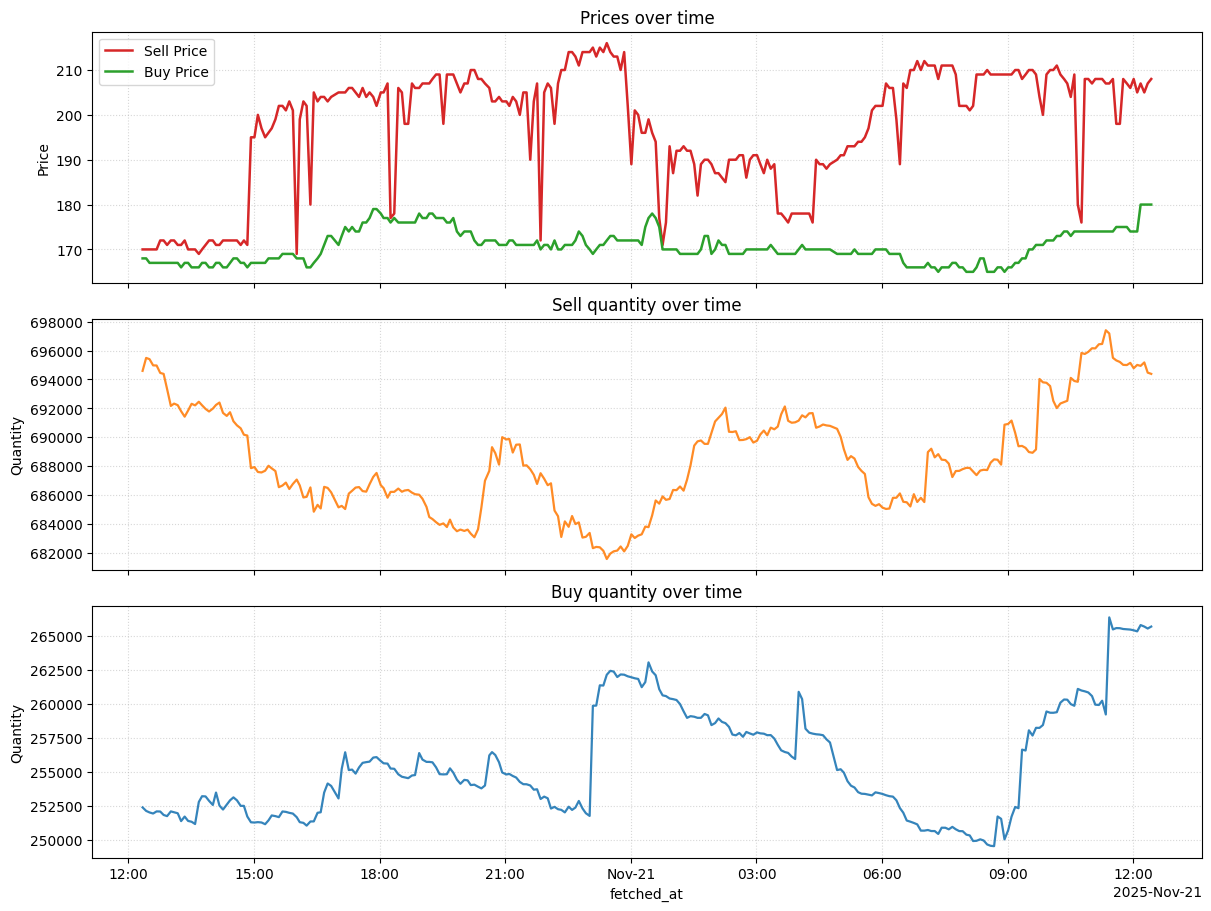

In [9]:
# Simple plots using known columns: prices, sell quantity, buy quantity
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Columns from data
time_col = "fetched_at"
sell_price_col = "sell_unit_price"
buy_price_col = "buy_unit_price"
sell_qty_col = "sell_quantity"
buy_qty_col = "buy_quantity"

# Prepare data
plot_df = prices_df.copy()
plot_df[time_col] = pd.to_datetime(plot_df[time_col], errors="coerce")
plot_df = plot_df.sort_values(time_col)
plot_df = plot_df[plot_df[time_col].notna()]

# Build figure with 3 subplots
fig, (ax_price, ax_sell_q, ax_buy_q) = plt.subplots(3, 1, sharex=True, figsize=(12, 9), layout="constrained")

# Prices
ax_price.plot(plot_df[time_col], plot_df[sell_price_col], color="tab:red", linewidth=1.8, label="Sell Price")
ax_price.plot(plot_df[time_col], plot_df[buy_price_col], color="tab:green", linewidth=1.8, label="Buy Price")
ax_price.set_title("Prices over time")
ax_price.set_ylabel("Price")
ax_price.grid(True, linestyle=":", alpha=0.5)
ax_price.legend(loc="upper left")

# Sell quantity
ax_sell_q.plot(plot_df[time_col], plot_df[sell_qty_col], color="tab:orange", linewidth=1.6, alpha=0.9)
ax_sell_q.set_title("Sell quantity over time")
ax_sell_q.set_ylabel("Quantity")
ax_sell_q.grid(True, linestyle=":", alpha=0.5)

# Buy quantity
ax_buy_q.plot(plot_df[time_col], plot_df[buy_qty_col], color="tab:blue", linewidth=1.6, alpha=0.9)
ax_buy_q.set_title("Buy quantity over time")
ax_buy_q.set_ylabel("Quantity")
ax_buy_q.grid(True, linestyle=":", alpha=0.5)

# Date formatting on bottom axis
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax_buy_q.xaxis.set_major_locator(locator)
ax_buy_q.xaxis.set_major_formatter(formatter)
plt.setp(ax_buy_q.get_xticklabels(), rotation=0, ha="center")
ax_buy_q.set_xlabel(time_col)

plt.show()


In [10]:
# gw2bltc test
gw2bltc_sql = "SELECT * FROM gw2bltc_historical_prices WHERE item_id = 19702 limit 10"
gw2bltc_df = pd.read_sql(gw2bltc_sql, engine)
gw2bltc_df.head()

,id,item_id,timestamp,sell_price,buy_price,supply,demand,sold,offers,bought,bids,created_at
0,49499683906,19702,1763690135,189,169,690445,258454,0,667,828,0,2025-11-21 02:10:41.743787+00:00
1,49499683905,19702,1763689339,189,173,689785,259282,0,2448,192,0,2025-11-21 02:10:41.743787+00:00
2,49499683904,19702,1763688473,192,169,695933,259474,0,0,0,0,2025-11-21 02:10:41.743787+00:00
3,49499683903,19702,1763687697,192,169,686651,259474,0,306,889,0,2025-11-21 02:10:41.743787+00:00
4,49499683902,19702,1763686765,187,170,686345,260363,0,691,275,0,2025-11-21 02:10:41.743787+00:00


In [11]:
gw2bltc_df.columns

Index(['id', 'item_id', 'timestamp', 'sell_price', 'buy_price', 'supply',
       'demand', 'sold', 'offers', 'bought', 'bids', 'created_at'],
      dtype='object')

In [12]:
# gw2tp test
gw2tp_sql = "SELECT * FROM gw2tp_historical_prices WHERE item_id = 19702 limit 10"
gw2tp_df = pd.read_sql(gw2tp_sql, engine)
gw2tp_df.head()

,id,item_id,timestamp,sell_price,buy_price,supply,demand,created_at
0,48451096452,19702,1763631700000,172,170,689614,257642,2025-11-20 09:43:25.592769+00:00
1,48451096451,19702,1763631404000,194,171,689754,257322,2025-11-20 09:43:25.592769+00:00
2,48451096450,19702,1763631101000,186,170,690081,257274,2025-11-20 09:43:25.592769+00:00
3,48451096449,19702,1763630805000,185,170,690451,257305,2025-11-20 09:43:25.592769+00:00
4,48451096448,19702,1763630505000,185,170,690732,257586,2025-11-20 09:43:25.592769+00:00


In [13]:
gw2tp_df.columns

Index(['id', 'item_id', 'timestamp', 'sell_price', 'buy_price', 'supply',
       'demand', 'created_at'],
      dtype='object')